# $\varepsilon$-Outage Capacity of Rayleigh Fading Channels

## Introduction

In this notebook, the worst-case and best-case $\varepsilon$-capacities for Rayleigh fading channels are shown. In addition, the $\varepsilon$-capacities for independent and comonotonic fading coefficients are given.

The $\varepsilon$-capacity is defined as
$$R^{\varepsilon}=\sup\left\{R: \Pr\left(X_1+X_2+\dots+X_n < \frac{2^R-1}{\rho}\right) < \varepsilon\right\},$$
where $\rho$ is the SNR.  
In the case of Rayleigh fading, all $\left|h_i\right|^2 = X_i$ are exponentially distributed, i.e., $\left|h_i\right|^2\sim\exp(1)$.


The final expression for the worst-case $\varepsilon$-capacity is given by
$$\underline{R}^{\varepsilon}(\rho) = \log_2\left(1-\rho \cdot \phi_{-}(1-\varepsilon)\right).$$
Please refer to the paper for details.  
An interactive overview of the actual calculations can be found in the Jupyter notebook [Worst-Case Epsilon-Outage Capacity of Rayleigh Fading Channels](worst-case-epsilon-outage-rayleigh.ipynb).


The best-case $\varepsilon$-capacity is given by a similar expression as
$$\overline{R}^{\varepsilon}(\rho) = \log_2\left(1-\rho \cdot \phi(1-\varepsilon)\right).$$
Please refer to the paper for details.  
An interactive overview of the actual calculations can be found in the Jupyter notebook [Best-Case Epsilon-Outage Capacity of Rayleigh Fading Channels](best-case-epsilon-outage-rayleigh.ipynb).

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interact

## Needed Functions

In [2]:
from best_case_rayleigh import best_case_rate
from worst_case_rayleigh import worst_case_rate

In [3]:
from scipy.special import gammaincinv

def iid_case_rate(eps, snr, n):
    return np.log2(1. + snr*gammaincinv(n, eps))

def comonotonic_case_rate(eps, snr, n):
    return np.log2(1. - snr*n*np.log(1-eps))

In [4]:
def calc_rates(eps, snr_db, n):
    snr = 10**(snr_db/10.)
    rates = {}
    rates['Best Case'] = [best_case_rate(_eps, snr, n) for _eps in eps]
    rates['Worst Case'] = [worst_case_rate(_eps, snr, n) for _eps in eps]
    rates['IID Case'] = iid_case_rate(eps, snr, n)
    rates['Comonotonic'] = comonotonic_case_rate(eps, snr, n)
    return rates

## Plot

<IPython.core.display.Javascript object>


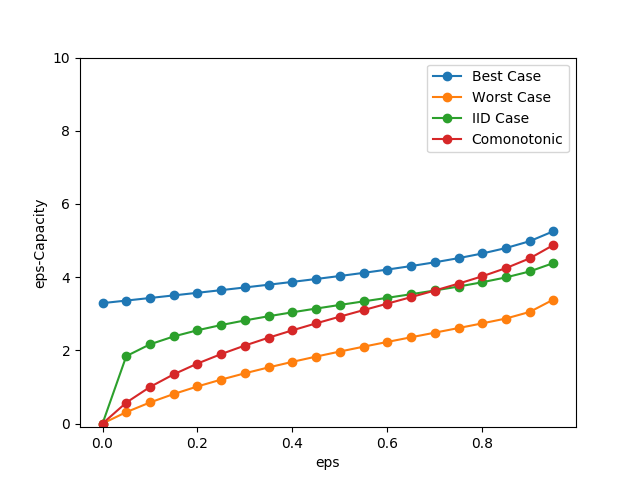

interactive(children=(IntSlider(value=3, description='n', max=10, min=3), FloatSlider(value=5.0, description='…

In [5]:
def outage_rate_plot(snr_init=5, n_init=5):
    fig, ax = plt.subplots(num="Eps-Outage Capacity of Rayleigh Fading Channels")
    ax.set_ylabel("eps-Capacity")
    ax.set_xlabel("eps")
    ax.set_ylim([-.1, 10])
    eps = np.arange(0, 1, .05)
    plots = {}
    _rates = calc_rates(eps, snr_init, n_init)
    for _label, _data in _rates.items():
        plots[_label] = ax.plot(eps, _data, 'o-', label=_label)[0]
    
    def update_plot(n=0, snr_db=5):
        _rates = calc_rates(eps, snr_db, n)
        for _label, _data in _rates.items():
            plots[_label].set_ydata(_data)
        fig.canvas.draw_idle()

    interact(update_plot, n=(3, 10, 1), snr_db=(0, 10, .5))
    ax.legend()

outage_rate_plot()